In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## EXERCICE 1 : Analyse de Corrélations

**Objectif** : Analyser les corrélations dans un nouveau dataset

**Consignes** :

1. Chargez le dataset fourni ci-dessous (données de ventes retail)
2. Calculez la matrice de corrélation
3. Créez une heatmap
4. Identifiez les 3 corrélations les plus fortes
5. Créez un scatter plot pour la corrélation la plus forte

In [3]:
np.random.seed(123)
n_produits = 400

prix = np.random.uniform(10, 200, n_produits)
quantite_vendue = 500 - prix * 1.5 + np.random.normal(0, 50, n_produits)
quantite_vendue = np.clip(quantite_vendue, 10, 800)

budget_marketing = prix * 0.15 + np.random.normal(0, 5, n_produits)
note_client = 3 + (quantite_vendue / 300) + np.random.normal(0, 0.5, n_produits)
note_client = np.clip(note_client, 1, 5)

taux_retour = 0.15 - (note_client / 50) + np.random.normal(0, 0.03, n_produits)
taux_retour = np.clip(taux_retour, 0, 0.4)

df_retail = pd.DataFrame({
    'prix_unitaire': prix.round(2),
    'quantite_vendue': quantite_vendue.round(0),
    'budget_marketing': budget_marketing.round(2),
    'note_client': note_client.round(1),
    'taux_retour': taux_retour.round(3)
})

print(f"Dimensions : {df_retail.shape}")
df_retail.head()

Dimensions : (400, 5)


,prix_unitaire,quantite_vendue,budget_marketing,note_client,taux_retour
0,142.33,199.0,23.31,3.6,0.087
1,64.37,386.0,13.39,4.6,0.000
2,53.10,411.0,9.33,4.2,0.015
3,114.75,350.0,19.34,4.2,0.046
4,146.70,273.0,20.85,3.8,0.102


In [28]:
mat_corr = df_retail.corr(method="pearson")
mat_corr.head()

,prix_unitaire,quantite_vendue,budget_marketing,note_client,taux_retour
prix_unitaire,1.000000,-0.843496,0.840070,-0.538575,0.160946
quantite_vendue,-0.843496,1.000000,-0.688075,0.608629,-0.156024
budget_marketing,0.840070,-0.688075,1.000000,-0.441069,0.133270
note_client,-0.538575,0.608629,-0.441069,1.000000,-0.307444
taux_retour,0.160946,-0.156024,0.133270,-0.307444,1.000000


<Axes: title={'center': 'Matrice de corrélation - Retail'}>

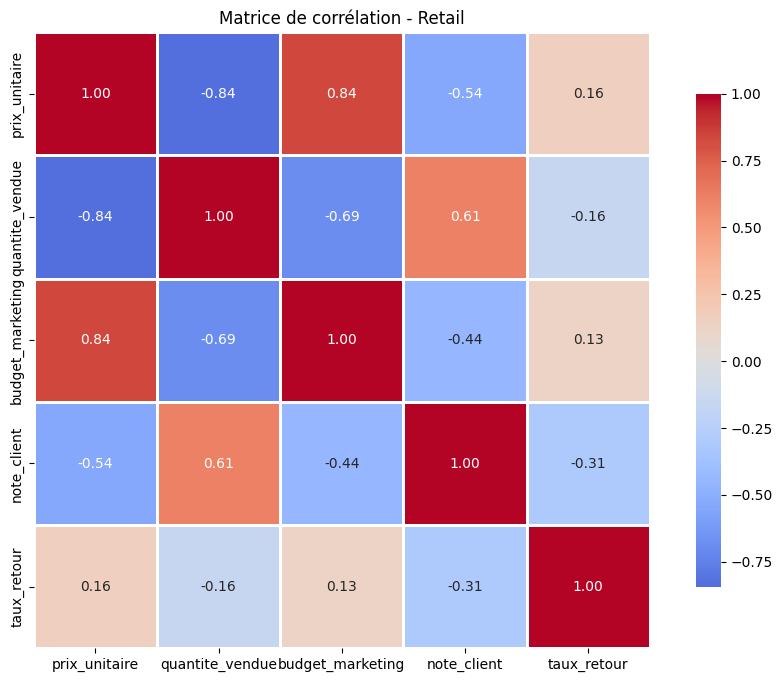

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Matrice de corrélation - Retail")

sns.heatmap(
    mat_corr,
    annot=True, # Afficher les valeurs
    cmap="coolwarm",
    center=0,
    square=True, # Cases carrées
    linewidths=1, # Séparation entre les cases
    cbar_kws={"shrink": 0.8}, # Barre de couleur
    fmt=".2f", # Arrondir les valeurs à 2 décimales
)

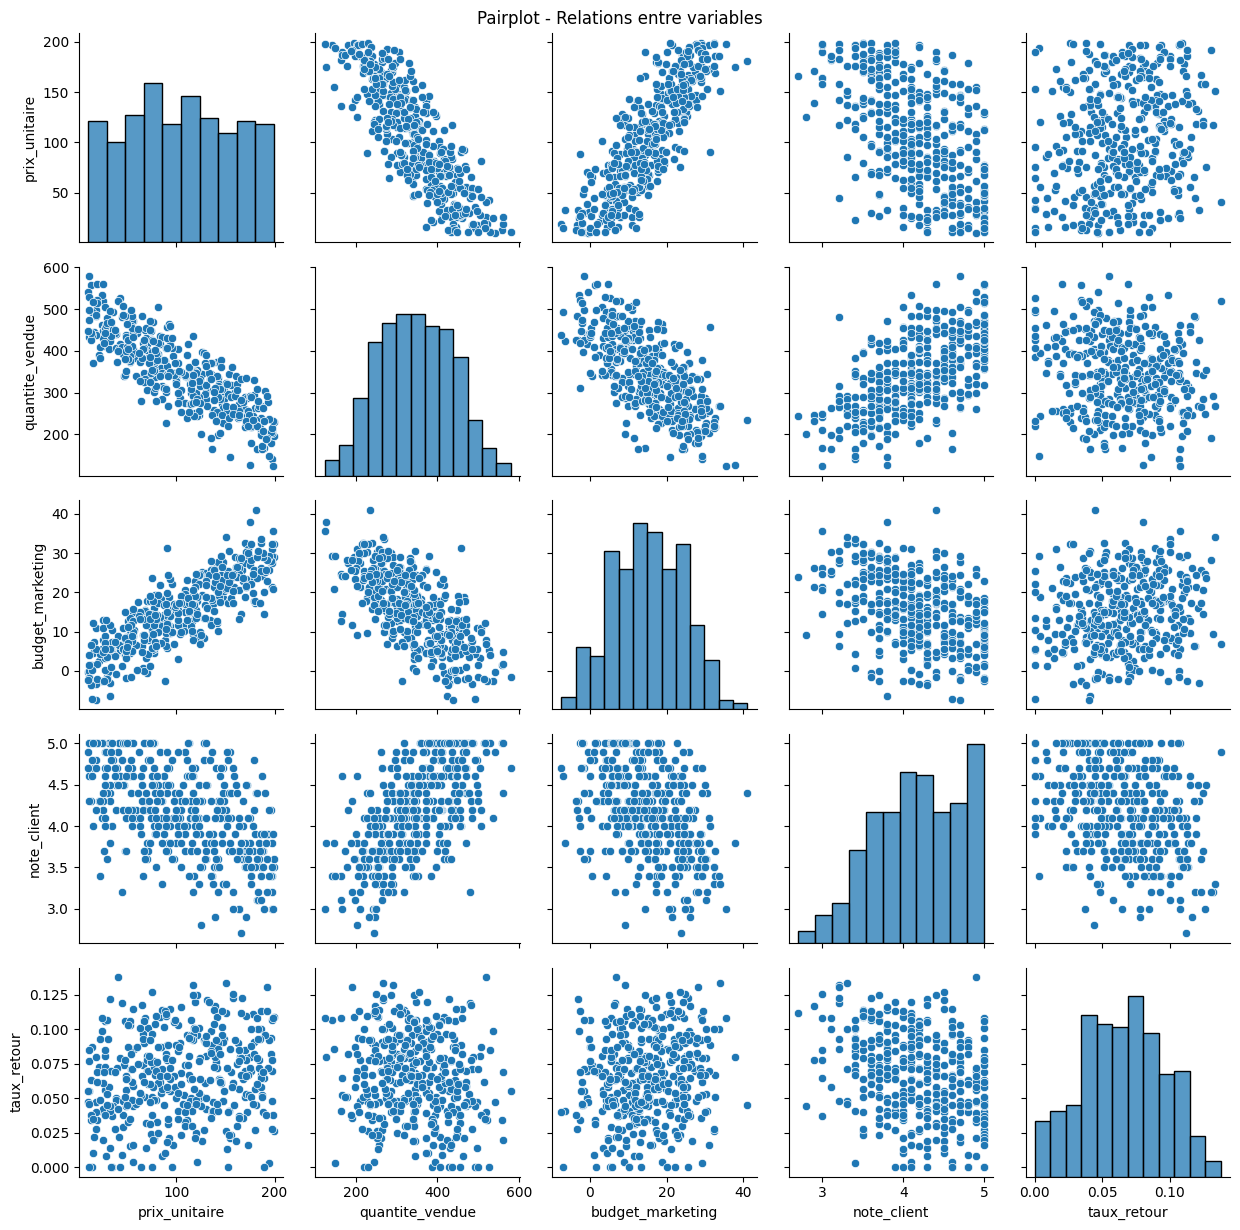

In [6]:
sns.pairplot(df_retail)
plt.suptitle("Pairplot - Relations entre variables")
plt.tight_layout()

In [59]:
def find_strong_correlation(matrix_correlation: np.ndarray, threshold: float = 0.5) -> pd.DataFrame:
    correlations = []
    n, m = matrix_correlation.shape
    for i in range(n):
        for j in range (i+1, m):
            corr_value = matrix_correlation.iloc[i, j]
            if abs(corr_value) > threshold:
                correlations.append({
                    "Variable 1": matrix_correlation.index[i],
                    "Variable 2": matrix_correlation.columns[j],
                    "Corrélation": corr_value,
                    "Force": "Forte" if abs(corr_value) > 0.7 else "Modérée"
                })
    return pd.DataFrame(correlations)

df_corr = find_strong_correlation(matrix_correlation=mat_corr, threshold=0.7)
df_corr.head(10)

,Variable 1,Variable 2,Corrélation,Force
0,prix_unitaire,quantite_vendue,-0.843496,Forte
1,prix_unitaire,budget_marketing,0.840070,Forte


In [60]:
def display_p_value(x: pd.Series, y: pd.Series) -> None:
    corr_value, p_value = pearsonr(x, y)

    print(f"\nAnalyse {x.name} vs {y.name}")
    print(f" Coefficient de corrélation : {corr_value:.03f}")
    print(f" P-value : {p_value:.05f}")

    print("Interprétation :")
    if p_value < 0.05:
        print(" La corrélation est statistiquement SIGNIFICATIVE")
    else:
        print(" La corrélation n'est statistiquement PAS SIGNIFICATIVE")

for var1, var2 in zip(df_corr["Variable 1"], df_corr["Variable 2"]):
    display_p_value(df_retail[var1], df_retail[var2])


Analyse prix_unitaire vs quantite_vendue
 Coefficient de corrélation : -0.843
 P-value : 0.00000
Interprétation :
 La corrélation est statistiquement SIGNIFICATIVE

Analyse prix_unitaire vs budget_marketing
 Coefficient de corrélation : 0.840
 P-value : 0.00000
Interprétation :
 La corrélation est statistiquement SIGNIFICATIVE


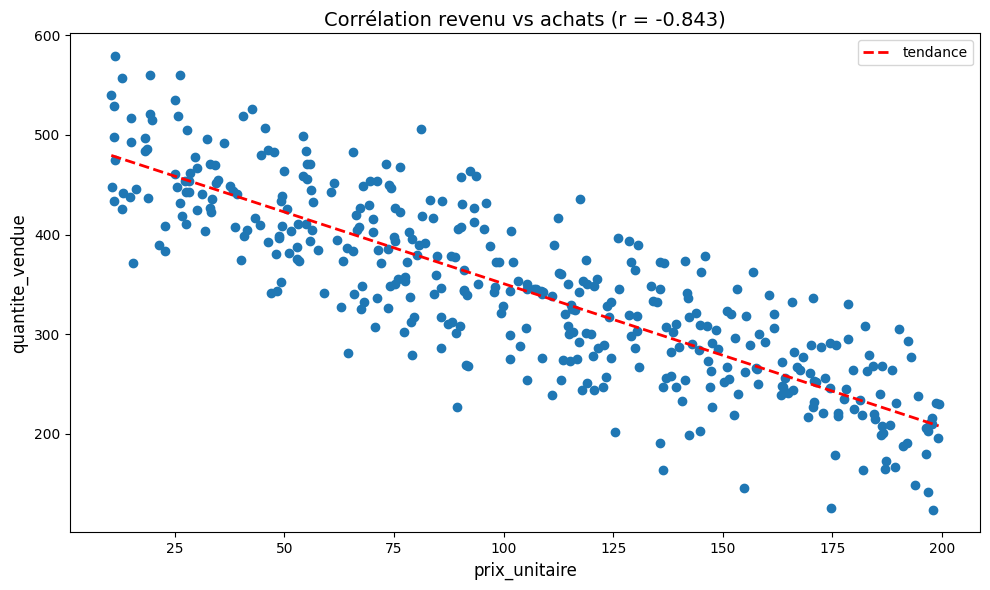

In [63]:
corr = df_retail["prix_unitaire"].corr(df_retail["quantite_vendue"])

plt.figure(figsize=(10,6))
plt.title(f"Corrélation revenu vs achats (r = {corr:.03f})", fontsize=14)

# Scatter plot
plt.scatter(df_retail["prix_unitaire"], df_retail["quantite_vendue"])
plt.xlabel("prix_unitaire", fontsize=12)
plt.ylabel("quantite_vendue", fontsize=12)

# Ligne de tendance
z = np.polyfit(x=df_retail["prix_unitaire"], y=df_retail["quantite_vendue"], deg=1)
p = np.poly1d(z) # Transforme les coefficients de z en polynome
plt.plot(df_retail["prix_unitaire"].sort_values(), p(df_retail["prix_unitaire"].sort_values()), "r--", linewidth=2, label="tendance")
plt.legend()

plt.tight_layout()